## Part I: Data Cleaning (Project 1)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import random

In [2]:
df = pd.read_csv("NY property csv.csv")

In [3]:
# Create a new variable BORO
df['BORO'] = df.BBLE.apply(lambda x: x[0] )

In [4]:
# Copy the table
dfw = df.copy()

### Method: Fill the missing values in 9 variables
#### Zip: group by boro and block...if only single one, choose the most common
#### Fullval: group by zip and taxclass. If less than 5, group by taxclass
#### Avland: group by zip and taxclass. If less than 5, group by taxclass
#### Avtot: group by zip and taxclass. If less than 5, group by taxclass
#### Ltfront: replace the value 0 with random numbers in (19,40), which are respectively the first quartile and the third quartile of LTFRONT. 
#### Fill all 0s with random numbers in this range. 
#### Ltdepth:  replace the value 0 with random numbers in (80, 100), which are respectively the first quartile and the third quartile of LTDEPTH
#### Bldfront: replace the value 0 with random numbers in (15, 24), which are respectively the first quartile and the third quartile of BLDFRONT
#### blddepth: replace the value 0 with random numbers in (26, 51), which are respectively the first quartile and the third quartile of BLDDEPTH
#### Stories: group by zip


### Fill in ZIP missing values

In [5]:
# Create a reference table for ZIP
ref_ZIP = dfw[dfw['ZIP'].notnull()].groupby(['BORO','BLOCK']).ZIP.agg('count').reset_index()

In [6]:
# Get the most frequent value in each ZIP code group
temp = dfw.groupby(['BORO','BLOCK']).ZIP.apply(lambda x: x.mode()).reset_index()

In [7]:
ref_ZIP['G_ZIP'] = temp['ZIP'].copy()

In [8]:
ref_ZIP.columns = ['BORO','BLOCK','COUNT','G_ZIP']

In [9]:
# Check the overall most frequent ZIP
most_freq = dfw.ZIP.mode()

In [10]:
ref_ZIP['R_ZIP'] = 'NA'

In [11]:
# If the reference group less than 2 record, use the overall msot frequent zip code
def zip_func(row):
    if row['COUNT'] <= 1:
        return 10314
    else:
        return row['G_ZIP']  

In [12]:
# Update the reference table by the above standard
ref_ZIP['R_ZIP'] = ref_ZIP.apply(zip_func, axis=1) 

In [13]:
# Join the reference table 
dfw = dfw.merge(ref_ZIP[['BORO','BLOCK','R_ZIP']], on=['BORO','BLOCK'],how='left')

In [14]:
# Fill in missing values in ZIP
dfw['ZIP'] = dfw['ZIP'].fillna(dfw['R_ZIP']).fillna(10314)

### Fill in Full Value

In [15]:
dfw['FULLVAL'].replace(0,np.nan,inplace=True)

In [16]:
ref_FV = dfw[dfw['FULLVAL'].notnull()].groupby(['ZIP','TAXCLASS']).FULLVAL.agg(['count','median']).reset_index()

In [17]:
temp = dfw[dfw['FULLVAL'].notnull()].groupby(['TAXCLASS']).FULLVAL.agg(['count','median']).reset_index()

In [18]:
ref_FV = ref_FV.merge(temp[['TAXCLASS','median']],on='TAXCLASS',how='left')
ref_FV.columns = ['ZIP','TAXCLASS','COUNT','MEDIAN_ZT','MEDIAN_T']

In [19]:
ref_FV['R_FULLVAL'] ='NA'

In [20]:
# If the reference group less than 5 records, use the result group by Taxclass
def adjust_func(row):
    if row['COUNT'] < 5:
        return row['MEDIAN_T']
    else:
        return row['MEDIAN_ZT']  

In [21]:
# Update the table by the sub reference values
ref_FV['R_FULLVAL'] = ref_FV.apply(adjust_func,axis=1)

In [22]:
# Join the reference table 
dfw = dfw.merge(ref_FV[['ZIP','TAXCLASS','R_FULLVAL']], on=['ZIP','TAXCLASS'],how='left')

In [23]:
dfw = dfw.merge(temp[['TAXCLASS','median']], on=['TAXCLASS'],how='left')

In [24]:
dfw['FULLVAL'] = dfw['FULLVAL'].fillna(dfw['R_FULLVAL']).fillna(dfw['median'])

### Fill in Avland

In [25]:
dfw['AVLAND'].replace(0,np.nan,inplace=True)

In [26]:
ref_AVL = dfw[dfw['AVLAND'].notnull()].groupby(['ZIP','TAXCLASS']).AVLAND.agg(['count','median']).reset_index()

In [27]:
temp = dfw[dfw['AVLAND'].notnull()].groupby(['TAXCLASS']).AVLAND.agg(['count','median']).reset_index()

In [28]:
ref_AVL = ref_AVL.merge(temp[['TAXCLASS','median']],on='TAXCLASS',how='left')
ref_AVL.columns = ['ZIP','TAXCLASS','COUNT','MEDIAN_ZT','MEDIAN_T']

In [29]:
ref_AVL['R_AVL'] ='NA'

In [30]:
# Update the table by the sub reference values
ref_AVL['R_AVL'] = ref_AVL.apply(adjust_func,axis=1)

In [31]:
# Join the reference table 
dfw = dfw.merge(ref_AVL[['ZIP','TAXCLASS','R_AVL']], on=['ZIP','TAXCLASS'],how='left')

In [32]:
dfw = dfw.merge(temp[['TAXCLASS','median']], on=['TAXCLASS'],how='left')

In [33]:
dfw['AVLAND'] = dfw['AVLAND'].fillna(dfw['R_AVL']).fillna(dfw['median_y'])

###  Fill in AVTOT

In [34]:
dfw['AVTOT'].replace(0,np.nan,inplace=True)

In [35]:
ref_AVT = dfw[dfw['AVTOT'].notnull()].groupby(['ZIP','TAXCLASS']).AVTOT.agg(['count','median']).reset_index()

In [36]:
temp = dfw[dfw['AVTOT'].notnull()].groupby(['TAXCLASS']).AVTOT.agg(['count','median']).reset_index()

In [37]:
ref_AVT = ref_AVT.merge(temp[['TAXCLASS','median']],on='TAXCLASS',how='left')
ref_AVT.columns = ['ZIP','TAXCLASS','COUNT','MEDIAN_ZT','MEDIAN_T']

In [38]:
ref_AVT['R_AVTOT'] ='NA'

In [39]:
# Update the table by the sub reference values
ref_AVT['R_AVTOT'] = ref_AVT.apply(adjust_func,axis=1)

In [40]:
# Join the reference table 
dfw = dfw.merge(ref_AVT[['ZIP','TAXCLASS','R_AVTOT']], on=['ZIP','TAXCLASS'],how='left')

In [41]:
dfw = dfw.merge(temp[['TAXCLASS','median']], on=['TAXCLASS'],how='left')

In [42]:
dfw['AVTOT'] = dfw['AVTOT'].fillna(dfw['R_AVTOT']).fillna(dfw['median'])

### LOT Front

In [43]:
dfw['LTFRONT'].replace(0,np.nan,inplace = True)

In [44]:
ref_LF = dfw[dfw['LTFRONT'].notnull()].groupby(['ZIP','BORO']).LTFRONT.agg(['count','median']).reset_index()

In [45]:
ref_LF.columns = ['ZIP','BORO','COUNT','MEDIAN_Zb']

In [46]:
lot_median = dfw[dfw['LTFRONT'].notnull()].LTFRONT.agg('median')

In [47]:
# If the reference group less than 5 records, use the result of total mean
def LotFront_func(row):
    if row['COUNT'] < 5:
        return lot_median
    else:
        return row['MEDIAN_Zb']  

In [48]:
ref_LF['R_LTFRONT'] = ref_LF.apply(LotFront_func,axis=1)

In [49]:
# Join the reference table 
dfw = dfw.merge(ref_LF[['ZIP','BORO','R_LTFRONT']], on=['ZIP','BORO'],how='left')

In [50]:
dfw['LTFRONT'] = dfw['LTFRONT'].fillna(dfw['R_LTFRONT'])

### Lot Depth

In [51]:
dfw['LTDEPTH'].replace(0,np.nan,inplace = True)

In [52]:
ref_LD = dfw[dfw['LTDEPTH'].notnull()].groupby(['ZIP','BORO']).LTDEPTH.agg(['count','median']).reset_index()

In [53]:
ref_LD.columns = ['ZIP','BORO','COUNT','MEDIAN_Zb']

In [54]:
lotD_median = dfw[dfw['LTDEPTH'].notnull()].LTDEPTH.agg('median')

In [55]:
# If the reference group less than 5 records, use the result of total mean
def LotDepth_func(row):
    if row['COUNT'] < 5:
        return lotD_median
    else:
        return row['MEDIAN_Zb']  

In [56]:
ref_LD['R_LTDEPTH'] = ref_LD.apply(LotDepth_func,axis=1)

In [57]:
# Join the reference table 
dfw = dfw.merge(ref_LD[['ZIP','BORO','R_LTDEPTH']], on=['ZIP','BORO'],how='left')

In [58]:
dfw['LTDEPTH'] = dfw['LTDEPTH'].fillna(dfw['R_LTDEPTH'])

### Building Front

In [59]:
dfw['BLDFRONT'].replace(0,np.nan,inplace = True)

In [60]:
ref_BF = dfw[dfw['BLDFRONT'].notnull()].groupby(['ZIP','BORO']).BLDFRONT.agg(['count','median']).reset_index()

In [61]:
ref_BF.columns = ['ZIP','BORO','COUNT','MEDIAN_Zb']

In [62]:
BDF_median = dfw[dfw['BLDFRONT'].notnull()].BLDFRONT.agg('median')

In [63]:
# If the reference group less than 5 records, use the result of total mean
def BLDFront_func(row):
    if row['COUNT'] < 5:
        return BDF_median
    else:
        return row['MEDIAN_Zb']  

In [64]:
ref_BF['R_BDFRONT'] = ref_BF.apply(BLDFront_func,axis=1)

In [65]:
# Join the reference table 
dfw = dfw.merge(ref_BF[['ZIP','BORO','R_BDFRONT']], on=['ZIP','BORO'],how='left')

In [66]:
dfw['BLDFRONT'] = dfw['BLDFRONT'].fillna(dfw['R_BDFRONT']).fillna(20)

### Building Depth

In [67]:
dfw['BLDDEPTH'].replace(0,np.nan,inplace = True)

In [68]:
ref_BD = dfw[dfw['BLDDEPTH'].notnull()].groupby(['ZIP','BORO']).BLDDEPTH.agg(['count','median']).reset_index()

In [69]:
ref_BD.columns = ['ZIP','BORO','COUNT','MEDIAN_Zb']

In [70]:
BDD_median = dfw[dfw['BLDDEPTH'].notnull()].BLDDEPTH.agg('median')

In [71]:
# If the reference group less than 5 records, use the result of total mean
def BLDDepth_func(row):
    if row['COUNT'] < 5:
        return BDD_median
    else:
        return row['MEDIAN_Zb']  

In [72]:
ref_BD['R_BDDEPTH'] = ref_BD.apply(BLDDepth_func,axis=1)

In [73]:
# Join the reference table 
dfw = dfw.merge(ref_BD[['ZIP','BORO','R_BDDEPTH']], on=['ZIP','BORO'],how='left')

In [74]:
dfw['BLDDEPTH'] = dfw['BLDDEPTH'].fillna(dfw['R_BDDEPTH']).fillna(39)

### Stories

In [75]:
ref_Stor = dfw[dfw['STORIES'].notnull()].groupby(['ZIP']).STORIES.agg(['median']).reset_index()

In [76]:
dfw = dfw.merge(ref_Stor,on='ZIP', how='left')

In [77]:
dfw.columns = ['RECORD', 'BBLE', 'BLOCK', 'LOT', 'EASEMENT', 'OWNER', 'BLDGCL',
       'TAXCLASS', 'LTFRONT', 'LTDEPTH', 'STORIES', 'FULLVAL', 'AVLAND',
       'AVTOT', 'EXLAND', 'EXTOT', 'EXCD1', 'STADDR', 'ZIP', 'EXMPTCL',
       'BLDFRONT', 'BLDDEPTH', 'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2',
       'EXCD2', 'PERIOD', 'YEAR', 'VALTYPE', 'BORO', 'R_ZIP', 'R_FULLVAL',
       'median_FULLVAL', 'R_AVL', 'median_AVL', 'R_AVTOT', 'median_AVTOT', 'R_LTFRONT',
       'R_LTDEPTH','R_BDFRONT','R_BDDEPTH','median_stories']

In [78]:
sto_med = df['STORIES'].median()

In [79]:
dfw['STORIES'] = dfw['STORIES'].fillna(dfw['median_stories']).fillna(sto_med)

### Aggregate

In [80]:
data = dfw[df.columns]

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 31 columns):
RECORD      1048575 non-null int64
BBLE        1048575 non-null object
BLOCK       1048575 non-null int64
LOT         1048575 non-null int64
EASEMENT    4043 non-null object
OWNER       1017492 non-null object
BLDGCL      1048575 non-null object
TAXCLASS    1048575 non-null object
LTFRONT     1048575 non-null float64
LTDEPTH     1048575 non-null float64
STORIES     1048575 non-null float64
FULLVAL     1048575 non-null float64
AVLAND      1048575 non-null float64
AVTOT       1048575 non-null float64
EXLAND      1048575 non-null int64
EXTOT       1048575 non-null int64
EXCD1       622642 non-null float64
STADDR      1047934 non-null object
ZIP         1048575 non-null float64
EXMPTCL     14992 non-null object
BLDFRONT    1048575 non-null float64
BLDDEPTH    1048575 non-null float64
AVLAND2     280966 non-null float64
AVTOT2      280972 non-null float64
EXLAND2     86675 non-nu

## Part II: Feature Engineer

In [82]:
data.head(10)

,RECORD,BBLE,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,...,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,BORO
0,1,3046020035,4602,35,NaN,DESMOND CAMPBELL,B1,1,18.0,100.0,...,36.0,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR,3
1,2,5046820019,4682,19,NaN,CINISOMO MARIO,A5,1,25.0,100.0,...,51.0,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR,5
2,3,3074790028,7479,28,NaN,GANGICHIODO DONALD,V0,1B,16.0,19.0,...,44.0,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR,3
3,4,4027980132,2798,132,NaN,DCAS,V0,1B,21.0,75.0,...,42.0,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR,4
4,5,1006950027E,695,27,E,CONRAIL,U6,3,50.0,98.0,...,80.0,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR,1
5,6,4031810007,3181,7,NaN,BERGERSON ERIC W,A5,1,20.0,100.0,...,37.0,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR,4
6,7,4051861001,5186,1001,NaN,GOLDEN HUANG LLC,R5,4,30.0,100.0,...,42.0,30960.0,268740.0,NaN,NaN,NaN,FINAL,2010/11,AC-TR,4
7,8,3082020064,8202,64,NaN,"SPICER, CLINTON",B1,1,24.0,100.0,...,44.0,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR,3
8,9,4052570008,5257,8,NaN,SILVIA SIPAVICIUS,A1,1,40.0,96.0,...,49.0,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR,4
9,10,3070780050,7078,50,NaN,ABHAS CHAUDHURI,C0,1,24.0,100.0,...,65.0,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR,3


### create 3 sizes

In [83]:
# lot area
data['lotarea'] = data.LTFRONT * data.LTDEPTH

/Users/tianzehu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [84]:
# building area
data['bldarea'] = data.BLDFRONT * data.BLDDEPTH

/Users/tianzehu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [85]:
# building volumn
data['bldvol'] = data.bldarea * data.STORIES

/Users/tianzehu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [86]:
data.head(10)

,RECORD,BBLE,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,...,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,BORO,lotarea,bldarea,bldvol
0,1,3046020035,4602,35,NaN,DESMOND CAMPBELL,B1,1,18.0,100.0,...,NaN,NaN,NaN,FINAL,2010/11,AC-TR,3,1800.0,648.0,1296.0
1,2,5046820019,4682,19,NaN,CINISOMO MARIO,A5,1,25.0,100.0,...,NaN,NaN,NaN,FINAL,2010/11,AC-TR,5,2500.0,714.0,2142.0
2,3,3074790028,7479,28,NaN,GANGICHIODO DONALD,V0,1B,16.0,19.0,...,NaN,NaN,NaN,FINAL,2010/11,AC-TR,3,304.0,880.0,1760.0
3,4,4027980132,2798,132,NaN,DCAS,V0,1B,21.0,75.0,...,NaN,NaN,NaN,FINAL,2010/11,AC-TR,4,1575.0,840.0,1680.0
4,5,1006950027E,695,27,E,CONRAIL,U6,3,50.0,98.0,...,NaN,NaN,NaN,FINAL,2010/11,AC-TR,1,4900.0,3520.0,35200.0
5,6,4031810007,3181,7,NaN,BERGERSON ERIC W,A5,1,20.0,100.0,...,NaN,NaN,NaN,FINAL,2010/11,AC-TR,4,2000.0,740.0,1480.0
6,7,4051861001,5186,1001,NaN,GOLDEN HUANG LLC,R5,4,30.0,100.0,...,NaN,NaN,NaN,FINAL,2010/11,AC-TR,4,3000.0,882.0,5292.0
7,8,3082020064,8202,64,NaN,"SPICER, CLINTON",B1,1,24.0,100.0,...,NaN,NaN,NaN,FINAL,2010/11,AC-TR,3,2400.0,880.0,1760.0
8,9,4052570008,5257,8,NaN,SILVIA SIPAVICIUS,A1,1,40.0,96.0,...,NaN,NaN,NaN,FINAL,2010/11,AC-TR,4,3840.0,1029.0,2058.0
9,10,3070780050,7078,50,NaN,ABHAS CHAUDHURI,C0,1,24.0,100.0,...,NaN,NaN,NaN,FINAL,2010/11,AC-TR,3,2400.0,1170.0,2340.0


### Normalize

In [87]:
## fullvalue/lotarea
data['fullvalue_lotarea'] = data.FULLVAL / data.lotarea

/Users/tianzehu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [88]:
## fullvalue / building area
data['fullvalue_bldarea'] = data.FULLVAL / data.bldarea

/Users/tianzehu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [89]:
## fullvalue / building vol
data['fullvalue_bldvol'] = data.FULLVAL / data.bldvol

/Users/tianzehu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [90]:
## avland / lotarea
data['avland_lotarea'] = data.AVLAND / data.lotarea

/Users/tianzehu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [91]:
## avland / bld area
data['avland_bldarea'] = data.AVLAND / data.bldarea

/Users/tianzehu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [92]:
## avland / building vol
data['avland_bldvol'] = data.AVLAND / data.bldvol

/Users/tianzehu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [93]:
## avtot / lot area
data['avtot_lotarea'] = data.AVTOT / data.lotarea
## avtot / bld area
data['avtot_bldarea'] = data.AVTOT / data.bldarea
## avtot / building volume
data['avtot_bldvol'] = data.AVTOT / data.bldvol

/Users/tianzehu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/tianzehu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [94]:
data.head(10)

,RECORD,BBLE,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,...,bldvol,fullvalue_lotarea,fullvalue_bldarea,fullvalue_bldvol,avland_lotarea,avland_bldarea,avland_bldvol,avtot_lotarea,avtot_bldarea,avtot_bldvol
0,1,3046020035,4602,35,NaN,DESMOND CAMPBELL,B1,1,18.0,100.0,...,1296.0,226.111111,628.086420,314.043210,6.853889,19.038580,9.519290,10.853889,30.149691,15.074846
1,2,5046820019,4682,19,NaN,CINISOMO MARIO,A5,1,25.0,100.0,...,2142.0,166.000000,581.232493,193.744164,5.320400,18.628852,6.209617,8.524800,29.848739,9.949580
2,3,3074790028,7479,28,NaN,GANGICHIODO DONALD,V0,1B,16.0,19.0,...,1760.0,421.052632,145.454545,72.727273,0.266447,0.092045,0.046023,0.266447,0.092045,0.046023
3,4,4027980132,2798,132,NaN,DCAS,V0,1B,21.0,75.0,...,1680.0,71.500317,134.063095,67.031548,1.231746,2.309524,1.154762,1.231746,2.309524,1.154762
4,5,1006950027E,695,27,E,CONRAIL,U6,3,50.0,98.0,...,35200.0,5.540816,7.713068,0.771307,2.162755,3.010653,0.301065,2.493367,3.470881,0.347088
5,6,4031810007,3181,7,NaN,BERGERSON ERIC W,A5,1,20.0,100.0,...,1480.0,291.000000,786.486486,393.243243,8.901000,24.056757,12.028378,14.929500,40.350000,20.175000
6,7,4051861001,5186,1001,NaN,GOLDEN HUANG LLC,R5,4,30.0,100.0,...,5292.0,179.666667,611.111111,101.851852,10.320000,35.102041,5.850340,80.850000,275.000000,45.833333
7,8,3082020064,8202,64,NaN,"SPICER, CLINTON",B1,1,24.0,100.0,...,1760.0,173.333333,472.727273,236.363636,5.819167,15.870455,7.935227,9.310417,25.392045,12.696023
8,9,4052570008,5257,8,NaN,SILVIA SIPAVICIUS,A1,1,40.0,96.0,...,2058.0,171.875000,641.399417,320.699708,3.754688,14.011662,7.005831,9.912500,36.991254,18.495627
9,10,3070780050,7078,50,NaN,ABHAS CHAUDHURI,C0,1,24.0,100.0,...,2340.0,292.500000,600.000000,300.000000,7.537917,15.462393,7.731197,12.363333,25.360684,12.680342


### create group average

In [95]:
## create zip3
data.ZIP = data.ZIP.astype(str)

In [96]:
def first3(n):
    return n[0:3]

In [97]:


data['zip3'] = data.ZIP.apply(first3)

In [98]:
data.head(10)

,RECORD,BBLE,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,...,fullvalue_lotarea,fullvalue_bldarea,fullvalue_bldvol,avland_lotarea,avland_bldarea,avland_bldvol,avtot_lotarea,avtot_bldarea,avtot_bldvol,zip3
0,1,3046020035,4602,35,NaN,DESMOND CAMPBELL,B1,1,18.0,100.0,...,226.111111,628.086420,314.043210,6.853889,19.038580,9.519290,10.853889,30.149691,15.074846,112
1,2,5046820019,4682,19,NaN,CINISOMO MARIO,A5,1,25.0,100.0,...,166.000000,581.232493,193.744164,5.320400,18.628852,6.209617,8.524800,29.848739,9.949580,103
2,3,3074790028,7479,28,NaN,GANGICHIODO DONALD,V0,1B,16.0,19.0,...,421.052632,145.454545,72.727273,0.266447,0.092045,0.046023,0.266447,0.092045,0.046023,112
3,4,4027980132,2798,132,NaN,DCAS,V0,1B,21.0,75.0,...,71.500317,134.063095,67.031548,1.231746,2.309524,1.154762,1.231746,2.309524,1.154762,113
4,5,1006950027E,695,27,E,CONRAIL,U6,3,50.0,98.0,...,5.540816,7.713068,0.771307,2.162755,3.010653,0.301065,2.493367,3.470881,0.347088,100
5,6,4031810007,3181,7,NaN,BERGERSON ERIC W,A5,1,20.0,100.0,...,291.000000,786.486486,393.243243,8.901000,24.056757,12.028378,14.929500,40.350000,20.175000,113
6,7,4051861001,5186,1001,NaN,GOLDEN HUANG LLC,R5,4,30.0,100.0,...,179.666667,611.111111,101.851852,10.320000,35.102041,5.850340,80.850000,275.000000,45.833333,113
7,8,3082020064,8202,64,NaN,"SPICER, CLINTON",B1,1,24.0,100.0,...,173.333333,472.727273,236.363636,5.819167,15.870455,7.935227,9.310417,25.392045,12.696023,112
8,9,4052570008,5257,8,NaN,SILVIA SIPAVICIUS,A1,1,40.0,96.0,...,171.875000,641.399417,320.699708,3.754688,14.011662,7.005831,9.912500,36.991254,18.495627,113
9,10,3070780050,7078,50,NaN,ABHAS CHAUDHURI,C0,1,24.0,100.0,...,292.500000,600.000000,300.000000,7.537917,15.462393,7.731197,12.363333,25.360684,12.680342,112


In [99]:
## zip5_avg
zip5_avg = data.groupby('ZIP')[['fullvalue_lotarea', 'fullvalue_bldarea', 'fullvalue_bldvol',
       'avland_lotarea', 'avland_bldarea', 'avland_bldvol', 'avtot_lotarea',
       'avtot_bldarea', 'avtot_bldvol']].mean()


In [100]:
zip5_avg.head(5)

,fullvalue_lotarea,fullvalue_bldarea,fullvalue_bldvol,avland_lotarea,avland_bldarea,avland_bldvol,avtot_lotarea,avtot_bldarea,avtot_bldvol
ZIP,,,,,,,,,
10001.0,581.854490,766.130458,137.015286,84.994819,117.119149,26.435311,224.041764,291.500440,47.952635
10002.0,370.651369,597.652897,165.197512,42.507995,104.178585,38.031195,119.535490,209.385839,57.959970
10003.0,621.284152,903.482760,193.494562,47.895447,74.110412,17.596603,147.420905,220.468752,38.869136
10004.0,357.755777,496.697986,136.199077,52.616047,110.880949,52.136003,149.112702,211.557879,58.466566
10005.0,126.457319,119.298568,7.132045,19.736864,18.280811,1.313338,55.635137,52.446475,2.963241


In [101]:
zip5_colname = ['fullvalue_lotarea', 'fullvalue_bldarea', 'fullvalue_bldvol',
       'avland_lotarea', 'avland_bldarea', 'avland_bldvol', 'avtot_lotarea',
       'avtot_bldarea', 'avtot_bldvol']

In [102]:
zip5_colname = ['zip5_' + x for x in zip5_colname]

In [103]:
zip5_avg.columns = zip5_colname

In [104]:
data = data.merge(zip5_avg, how = 'left', on = 'ZIP')

In [105]:
data.columns

Index(['RECORD', 'BBLE', 'BLOCK', 'LOT', 'EASEMENT', 'OWNER', 'BLDGCL',
       'TAXCLASS', 'LTFRONT', 'LTDEPTH', 'STORIES', 'FULLVAL', 'AVLAND',
       'AVTOT', 'EXLAND', 'EXTOT', 'EXCD1', 'STADDR', 'ZIP', 'EXMPTCL',
       'BLDFRONT', 'BLDDEPTH', 'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2',
       'EXCD2', 'PERIOD', 'YEAR', 'VALTYPE', 'BORO', 'lotarea', 'bldarea',
       'bldvol', 'fullvalue_lotarea', 'fullvalue_bldarea', 'fullvalue_bldvol',
       'avland_lotarea', 'avland_bldarea', 'avland_bldvol', 'avtot_lotarea',
       'avtot_bldarea', 'avtot_bldvol', 'zip3', 'zip5_fullvalue_lotarea',
       'zip5_fullvalue_bldarea', 'zip5_fullvalue_bldvol',
       'zip5_avland_lotarea', 'zip5_avland_bldarea', 'zip5_avland_bldvol',
       'zip5_avtot_lotarea', 'zip5_avtot_bldarea', 'zip5_avtot_bldvol'],
      dtype='object')

In [106]:
temp1 = data.loc[:,'fullvalue_lotarea':'avtot_bldvol']

In [107]:
temp1.head(10)

,fullvalue_lotarea,fullvalue_bldarea,fullvalue_bldvol,avland_lotarea,avland_bldarea,avland_bldvol,avtot_lotarea,avtot_bldarea,avtot_bldvol
0,226.111111,628.086420,314.043210,6.853889,19.038580,9.519290,10.853889,30.149691,15.074846
1,166.000000,581.232493,193.744164,5.320400,18.628852,6.209617,8.524800,29.848739,9.949580
2,421.052632,145.454545,72.727273,0.266447,0.092045,0.046023,0.266447,0.092045,0.046023
3,71.500317,134.063095,67.031548,1.231746,2.309524,1.154762,1.231746,2.309524,1.154762
4,5.540816,7.713068,0.771307,2.162755,3.010653,0.301065,2.493367,3.470881,0.347088
5,291.000000,786.486486,393.243243,8.901000,24.056757,12.028378,14.929500,40.350000,20.175000
6,179.666667,611.111111,101.851852,10.320000,35.102041,5.850340,80.850000,275.000000,45.833333
7,173.333333,472.727273,236.363636,5.819167,15.870455,7.935227,9.310417,25.392045,12.696023
8,171.875000,641.399417,320.699708,3.754688,14.011662,7.005831,9.912500,36.991254,18.495627
9,292.500000,600.000000,300.000000,7.537917,15.462393,7.731197,12.363333,25.360684,12.680342


In [108]:
temp2 = data.loc[:,'zip5_fullvalue_lotarea':'zip5_avtot_bldvol']

In [109]:
temp2.head(10)

,zip5_fullvalue_lotarea,zip5_fullvalue_bldarea,zip5_fullvalue_bldvol,zip5_avland_lotarea,zip5_avland_bldarea,zip5_avland_bldvol,zip5_avtot_lotarea,zip5_avtot_bldarea,zip5_avtot_bldvol
0,184.140300,493.154835,263.253922,6.363381,20.288096,11.762834,12.890951,40.139853,20.654633
1,123.397683,516.139211,302.381383,4.829694,25.597277,16.179878,8.849480,38.173509,23.547306
2,188.641820,550.604494,286.742726,6.713033,27.129367,13.162515,17.697002,59.695357,24.172006
3,196.853773,599.683880,316.994532,6.824277,26.657567,15.104950,12.812475,44.047925,24.443921
4,459.168416,761.372636,190.048028,29.710307,55.748758,17.585960,94.155880,161.764477,33.355622
5,231.744997,821.104228,369.666455,8.740899,38.306399,19.105717,19.944181,72.592342,30.419230
6,171.775231,522.613631,247.076802,6.091698,24.569419,13.679373,16.263925,55.325555,23.444265
7,189.840494,532.825151,300.346738,8.414797,25.310756,14.772534,13.282325,38.935318,22.546713
8,180.157016,695.404097,340.889886,6.022817,26.130742,13.687524,11.776335,44.382128,22.765003
9,265.454859,715.222138,357.405942,7.692856,23.038830,12.443418,16.026302,42.003701,21.173039


In [110]:
zip5_var = temp1/temp2.values

In [111]:
zip5_var.columns = zip5_colname

In [112]:
zip5_var.head(10)

,zip5_fullvalue_lotarea,zip5_fullvalue_bldarea,zip5_fullvalue_bldvol,zip5_avland_lotarea,zip5_avland_bldarea,zip5_avland_bldvol,zip5_avtot_lotarea,zip5_avtot_bldarea,zip5_avtot_bldvol
0,1.227928,1.273609,1.192929,1.077083,0.938411,0.809268,0.841977,0.751116,0.729853
1,1.345244,1.126116,0.640728,1.101602,0.727767,0.383786,0.963311,0.781923,0.422536
2,2.232022,0.264172,0.253632,0.039691,0.003393,0.003496,0.015056,0.001542,0.001904
3,0.363215,0.223556,0.211460,0.180495,0.086637,0.076449,0.096136,0.052432,0.047241
4,0.012067,0.010130,0.004058,0.072795,0.054004,0.017120,0.026481,0.021456,0.010406
5,1.255691,0.957840,1.063779,1.018316,0.628009,0.629570,0.748564,0.555844,0.663232
6,1.045940,1.169336,0.412227,1.694109,1.428688,0.427676,4.971125,4.970578,1.954991
7,0.913047,0.887209,0.786969,0.691540,0.627024,0.537161,0.700963,0.652160,0.563099
8,0.954029,0.922341,0.940772,0.623411,0.536214,0.511841,0.841730,0.833472,0.812459
9,1.101882,0.838900,0.839382,0.979859,0.671145,0.621308,0.771440,0.603773,0.598891


In [113]:
## zip3 average
zip3_avg = data.groupby('zip3')[['fullvalue_lotarea', 'fullvalue_bldarea', 'fullvalue_bldvol',
       'avland_lotarea', 'avland_bldarea', 'avland_bldvol', 'avtot_lotarea',
       'avtot_bldarea', 'avtot_bldvol']].mean()

zip3_avg.head(5)

zip3_colname = ['fullvalue_lotarea', 'fullvalue_bldarea', 'fullvalue_bldvol',
       'avland_lotarea', 'avland_bldarea', 'avland_bldvol', 'avtot_lotarea',
       'avtot_bldarea', 'avtot_bldvol']

zip3_colname = ['zip3_' + x for x in zip3_colname]

zip3_avg.columns = zip3_colname

data = data.merge(zip3_avg, how = 'left', on = 'zip3')

data.columns

temp3 = data.loc[:,'fullvalue_lotarea':'avtot_bldvol']
temp4 = data.loc[:,'zip3_fullvalue_lotarea':'zip3_avtot_bldvol']

zip3_var = temp3/temp4.values
zip3_var.head(10)

,fullvalue_lotarea,fullvalue_bldarea,fullvalue_bldvol,avland_lotarea,avland_bldarea,avland_bldvol,avtot_lotarea,avtot_bldarea,avtot_bldvol
0,0.913241,0.970711,1.066992,0.897572,0.536672,0.539491,0.561323,0.489155,0.555677
1,1.308624,0.942791,0.580957,0.898055,0.260357,0.162462,0.828089,0.341238,0.214000
2,1.700591,0.224801,0.247098,0.034893,0.002595,0.002608,0.013780,0.001493,0.001696
3,0.367406,0.201809,0.193545,0.177024,0.056601,0.044154,0.079029,0.033799,0.030673
4,0.014427,0.012944,0.005792,0.058428,0.042311,0.016091,0.023979,0.021137,0.010953
5,1.495309,1.183923,1.135441,1.279232,0.589575,0.459927,0.957884,0.590513,0.535888
6,0.923220,0.919925,0.294085,1.483167,0.860270,0.223699,5.187374,4.024561,1.217424
7,0.700077,0.730603,0.803069,0.762067,0.447366,0.449717,0.481500,0.411966,0.467991
8,0.883183,0.965519,0.925981,0.539615,0.343393,0.267881,0.635991,0.541358,0.491280
9,1.181379,0.927303,1.019279,0.987151,0.435864,0.438154,0.639386,0.411457,0.467413


In [114]:
zip3_colname = ['fullvalue_lotarea', 'fullvalue_bldarea', 'fullvalue_bldvol',
       'avland_lotarea', 'avland_bldarea', 'avland_bldvol', 'avtot_lotarea',
       'avtot_bldarea', 'avtot_bldvol']

zip3_colname = ['zip3_' + x for x in zip3_colname]

zip3_var.columns = zip3_colname

In [115]:
## tax class average
TAXCLASS_avg = data.groupby('TAXCLASS')[['fullvalue_lotarea', 'fullvalue_bldarea', 'fullvalue_bldvol',
       'avland_lotarea', 'avland_bldarea', 'avland_bldvol', 'avtot_lotarea',
       'avtot_bldarea', 'avtot_bldvol']].mean()

TAXCLASS_avg.head(5)

TAXCLASS_colname = ['fullvalue_lotarea', 'fullvalue_bldarea', 'fullvalue_bldvol',
       'avland_lotarea', 'avland_bldarea', 'avland_bldvol', 'avtot_lotarea',
       'avtot_bldarea', 'avtot_bldvol']

TAXCLASS_colname = ['TAXCLASS_' + x for x in TAXCLASS_colname]

TAXCLASS_avg.columns = TAXCLASS_colname

data = data.merge(TAXCLASS_avg, how = 'left', on = 'TAXCLASS')

data.columns

temp5 = data.loc[:,'fullvalue_lotarea':'avtot_bldvol']
temp6 = data.loc[:,'TAXCLASS_fullvalue_lotarea':'TAXCLASS_avtot_bldvol']

TAXCLASS_var = temp5/temp6.values
TAXCLASS_var.head(10)

,fullvalue_lotarea,fullvalue_bldarea,fullvalue_bldvol,avland_lotarea,avland_bldarea,avland_bldvol,avtot_lotarea,avtot_bldarea,avtot_bldvol
0,0.977531,0.894640,0.924684,1.186198,1.053909,1.067221,1.116906,0.989973,1.008274
1,0.717657,0.827902,0.570470,0.920798,1.031228,0.696169,0.877234,0.980091,0.665473
2,4.071496,0.229731,0.236584,0.132153,0.005577,0.005755,0.132100,0.005576,0.005754
3,0.691394,0.211740,0.218056,0.610921,0.139927,0.144405,0.610679,0.139897,0.144372
4,0.198735,0.270644,0.057580,0.198767,0.270504,0.057502,0.198735,0.270644,0.057580
5,1.258061,1.120264,1.157884,1.540491,1.331698,1.348519,1.536302,1.324902,1.349395
6,0.752724,0.647047,0.257058,0.241434,0.117212,0.041357,0.752157,0.578006,0.234807
7,0.749361,0.673348,0.695960,1.007120,0.878533,0.889630,0.958077,0.833754,0.849167
8,0.743056,0.913603,0.944283,0.649821,0.775637,0.785434,1.020034,1.214617,1.237071
9,1.264546,0.854634,0.883334,1.304583,0.855944,0.866755,1.272234,0.832724,0.848119


In [116]:
TAXCLASS_colname = ['fullvalue_lotarea', 'fullvalue_bldarea', 'fullvalue_bldvol',
       'avland_lotarea', 'avland_bldarea', 'avland_bldvol', 'avtot_lotarea',
       'avtot_bldarea', 'avtot_bldvol']

TAXCLASS_colname = ['taxclass_' + x for x in TAXCLASS_colname]

TAXCLASS_var.columns = TAXCLASS_colname

In [117]:
## boro average
boro_avg = data.groupby('BORO')[['fullvalue_lotarea', 'fullvalue_bldarea', 'fullvalue_bldvol',
       'avland_lotarea', 'avland_bldarea', 'avland_bldvol', 'avtot_lotarea',
       'avtot_bldarea', 'avtot_bldvol']].mean()

boro_colname = ['fullvalue_lotarea', 'fullvalue_bldarea', 'fullvalue_bldvol',
       'avland_lotarea', 'avland_bldarea', 'avland_bldvol', 'avtot_lotarea',
       'avtot_bldarea', 'avtot_bldvol']

boro_colname = ['boro_' + x for x in boro_colname]

boro_avg.columns = boro_colname

data = data.merge(boro_avg, how = 'left', on = 'BORO')

temp1 = data.loc[:,'fullvalue_lotarea':'avtot_bldvol']

temp2 = data.loc[:,'boro_fullvalue_lotarea':'boro_avtot_bldvol']

boro_var = temp1/temp2.values

boro_var.columns = boro_colname

In [118]:
temp1.head(10)

,fullvalue_lotarea,fullvalue_bldarea,fullvalue_bldvol,avland_lotarea,avland_bldarea,avland_bldvol,avtot_lotarea,avtot_bldarea,avtot_bldvol
0,226.111111,628.086420,314.043210,6.853889,19.038580,9.519290,10.853889,30.149691,15.074846
1,166.000000,581.232493,193.744164,5.320400,18.628852,6.209617,8.524800,29.848739,9.949580
2,421.052632,145.454545,72.727273,0.266447,0.092045,0.046023,0.266447,0.092045,0.046023
3,71.500317,134.063095,67.031548,1.231746,2.309524,1.154762,1.231746,2.309524,1.154762
4,5.540816,7.713068,0.771307,2.162755,3.010653,0.301065,2.493367,3.470881,0.347088
5,291.000000,786.486486,393.243243,8.901000,24.056757,12.028378,14.929500,40.350000,20.175000
6,179.666667,611.111111,101.851852,10.320000,35.102041,5.850340,80.850000,275.000000,45.833333
7,173.333333,472.727273,236.363636,5.819167,15.870455,7.935227,9.310417,25.392045,12.696023
8,171.875000,641.399417,320.699708,3.754688,14.011662,7.005831,9.912500,36.991254,18.495627
9,292.500000,600.000000,300.000000,7.537917,15.462393,7.731197,12.363333,25.360684,12.680342


In [119]:
temp2.head(10)

,boro_fullvalue_lotarea,boro_fullvalue_bldarea,boro_fullvalue_bldvol,boro_avland_lotarea,boro_avland_bldarea,boro_avland_bldvol,boro_avtot_lotarea,boro_avtot_bldarea,boro_avtot_bldvol
0,247.496608,649.588506,296.184024,7.644482,36.306462,18.289048,19.333584,62.457242,27.792808
1,125.465449,547.710322,294.237912,5.140906,38.942542,19.929572,9.372765,54.500423,27.817336
2,247.496608,649.588506,296.184024,7.644482,36.306462,18.289048,19.333584,62.457242,27.792808
3,170.482060,681.891265,338.541274,6.480506,54.791035,27.022165,13.865335,91.546291,41.071801
4,375.162963,594.160720,140.780558,35.969450,73.538786,22.809591,101.194706,164.756544,35.420290
5,170.482060,681.891265,338.541274,6.480506,54.791035,27.022165,13.865335,91.546291,41.071801
6,170.482060,681.891265,338.541274,6.480506,54.791035,27.022165,13.865335,91.546291,41.071801
7,247.496608,649.588506,296.184024,7.644482,36.306462,18.289048,19.333584,62.457242,27.792808
8,170.482060,681.891265,338.541274,6.480506,54.791035,27.022165,13.865335,91.546291,41.071801
9,247.496608,649.588506,296.184024,7.644482,36.306462,18.289048,19.333584,62.457242,27.792808


In [120]:
boro_var.head(10)

,boro_fullvalue_lotarea,boro_fullvalue_bldarea,boro_fullvalue_bldvol,boro_avland_lotarea,boro_avland_bldarea,boro_avland_bldvol,boro_avtot_lotarea,boro_avtot_bldarea,boro_avtot_bldvol
0,0.913593,0.966899,1.060298,0.896580,0.524385,0.520491,0.561401,0.482725,0.542401
1,1.323073,1.061204,0.658461,1.034915,0.478368,0.311578,0.909529,0.547679,0.357676
2,1.701246,0.223918,0.245548,0.034855,0.002535,0.002516,0.013782,0.001474,0.001656
3,0.419401,0.196605,0.198001,0.190069,0.042151,0.042734,0.088836,0.025228,0.028116
4,0.014769,0.012981,0.005479,0.060128,0.040940,0.013199,0.024639,0.021067,0.009799
5,1.706924,1.153390,1.161581,1.373504,0.439064,0.445130,1.076750,0.440761,0.491213
6,1.053874,0.896200,0.300855,1.592468,0.640653,0.216502,5.831089,3.003945,1.115932
7,0.700346,0.727733,0.798030,0.761224,0.437125,0.433879,0.481567,0.406551,0.456810
8,1.008171,0.940618,0.947299,0.579382,0.255729,0.259262,0.714912,0.404072,0.450324
9,1.181834,0.923662,1.012884,0.986060,0.425885,0.422723,0.639474,0.406049,0.456245


In [121]:
data.head(10)

,RECORD,BBLE,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,...,TAXCLASS_avtot_bldvol,boro_fullvalue_lotarea,boro_fullvalue_bldarea,boro_fullvalue_bldvol,boro_avland_lotarea,boro_avland_bldarea,boro_avland_bldvol,boro_avtot_lotarea,boro_avtot_bldarea,boro_avtot_bldvol
0,1,3046020035,4602,35,NaN,DESMOND CAMPBELL,B1,1,18.0,100.0,...,14.951143,247.496608,649.588506,296.184024,7.644482,36.306462,18.289048,19.333584,62.457242,27.792808
1,2,5046820019,4682,19,NaN,CINISOMO MARIO,A5,1,25.0,100.0,...,14.951143,125.465449,547.710322,294.237912,5.140906,38.942542,19.929572,9.372765,54.500423,27.817336
2,3,3074790028,7479,28,NaN,GANGICHIODO DONALD,V0,1B,16.0,19.0,...,7.998491,247.496608,649.588506,296.184024,7.644482,36.306462,18.289048,19.333584,62.457242,27.792808
3,4,4027980132,2798,132,NaN,DCAS,V0,1B,21.0,75.0,...,7.998491,170.482060,681.891265,338.541274,6.480506,54.791035,27.022165,13.865335,91.546291,41.071801
4,5,1006950027E,695,27,E,CONRAIL,U6,3,50.0,98.0,...,6.027930,375.162963,594.160720,140.780558,35.969450,73.538786,22.809591,101.194706,164.756544,35.420290
5,6,4031810007,3181,7,NaN,BERGERSON ERIC W,A5,1,20.0,100.0,...,14.951143,170.482060,681.891265,338.541274,6.480506,54.791035,27.022165,13.865335,91.546291,41.071801
6,7,4051861001,5186,1001,NaN,GOLDEN HUANG LLC,R5,4,30.0,100.0,...,195.195880,170.482060,681.891265,338.541274,6.480506,54.791035,27.022165,13.865335,91.546291,41.071801
7,8,3082020064,8202,64,NaN,"SPICER, CLINTON",B1,1,24.0,100.0,...,14.951143,247.496608,649.588506,296.184024,7.644482,36.306462,18.289048,19.333584,62.457242,27.792808
8,9,4052570008,5257,8,NaN,SILVIA SIPAVICIUS,A1,1,40.0,96.0,...,14.951143,170.482060,681.891265,338.541274,6.480506,54.791035,27.022165,13.865335,91.546291,41.071801
9,10,3070780050,7078,50,NaN,ABHAS CHAUDHURI,C0,1,24.0,100.0,...,14.951143,247.496608,649.588506,296.184024,7.644482,36.306462,18.289048,19.333584,62.457242,27.792808


In [122]:
## all average
all_avg = data[['fullvalue_lotarea', 'fullvalue_bldarea', 'fullvalue_bldvol',
       'avland_lotarea', 'avland_bldarea', 'avland_bldvol', 'avtot_lotarea',
       'avtot_bldarea', 'avtot_bldvol']].mean()

In [123]:
all_avg

fullvalue_lotarea    214.377371
fullvalue_bldarea    620.393683
fullvalue_bldvol     280.084381
avland_lotarea        10.732307
avland_bldarea        47.160257
avland_bldvol         21.794538
avtot_lotarea         27.428863
avtot_bldarea         85.514699
avtot_bldvol          33.275894
dtype: float64

In [124]:
temp1.head(10)

,fullvalue_lotarea,fullvalue_bldarea,fullvalue_bldvol,avland_lotarea,avland_bldarea,avland_bldvol,avtot_lotarea,avtot_bldarea,avtot_bldvol
0,226.111111,628.086420,314.043210,6.853889,19.038580,9.519290,10.853889,30.149691,15.074846
1,166.000000,581.232493,193.744164,5.320400,18.628852,6.209617,8.524800,29.848739,9.949580
2,421.052632,145.454545,72.727273,0.266447,0.092045,0.046023,0.266447,0.092045,0.046023
3,71.500317,134.063095,67.031548,1.231746,2.309524,1.154762,1.231746,2.309524,1.154762
4,5.540816,7.713068,0.771307,2.162755,3.010653,0.301065,2.493367,3.470881,0.347088
5,291.000000,786.486486,393.243243,8.901000,24.056757,12.028378,14.929500,40.350000,20.175000
6,179.666667,611.111111,101.851852,10.320000,35.102041,5.850340,80.850000,275.000000,45.833333
7,173.333333,472.727273,236.363636,5.819167,15.870455,7.935227,9.310417,25.392045,12.696023
8,171.875000,641.399417,320.699708,3.754688,14.011662,7.005831,9.912500,36.991254,18.495627
9,292.500000,600.000000,300.000000,7.537917,15.462393,7.731197,12.363333,25.360684,12.680342


In [125]:
all_var = temp1 / all_avg

In [126]:
all_var.head(10)

,fullvalue_lotarea,fullvalue_bldarea,fullvalue_bldvol,avland_lotarea,avland_bldarea,avland_bldvol,avtot_lotarea,avtot_bldarea,avtot_bldvol
0,1.054734,1.012400,1.121245,0.638622,0.403700,0.436774,0.395710,0.352567,0.453026
1,0.774335,0.936877,0.691735,0.495737,0.395012,0.284916,0.310797,0.349048,0.299003
2,1.964072,0.234455,0.259662,0.024827,0.001952,0.002112,0.009714,0.001076,0.001383
3,0.333525,0.216094,0.239326,0.114770,0.048972,0.052984,0.044907,0.027007,0.034703
4,0.025846,0.012433,0.002754,0.201518,0.063839,0.013814,0.090903,0.040588,0.010431
5,1.357419,1.267722,1.404017,0.829365,0.510107,0.551899,0.544299,0.471849,0.606295
6,0.838086,0.985038,0.363647,0.961583,0.744314,0.268431,2.947625,3.215821,1.377373
7,0.808543,0.761980,0.843902,0.542210,0.336522,0.364092,0.339439,0.296932,0.381538
8,0.801740,1.033859,1.145011,0.349849,0.297107,0.321449,0.361389,0.432572,0.555827
9,1.364416,0.967128,1.071106,0.702358,0.327869,0.354731,0.450742,0.296565,0.381067


In [127]:
all_colname = ['fullvalue_lotarea', 'fullvalue_bldarea', 'fullvalue_bldvol',
       'avland_lotarea', 'avland_bldarea', 'avland_bldvol', 'avtot_lotarea',
       'avtot_bldarea', 'avtot_bldvol']

all_colname = ['all_' + x for x in all_colname]



In [128]:
all_var.columns = all_colname

In [129]:
all_var.head(10)

,all_fullvalue_lotarea,all_fullvalue_bldarea,all_fullvalue_bldvol,all_avland_lotarea,all_avland_bldarea,all_avland_bldvol,all_avtot_lotarea,all_avtot_bldarea,all_avtot_bldvol
0,1.054734,1.012400,1.121245,0.638622,0.403700,0.436774,0.395710,0.352567,0.453026
1,0.774335,0.936877,0.691735,0.495737,0.395012,0.284916,0.310797,0.349048,0.299003
2,1.964072,0.234455,0.259662,0.024827,0.001952,0.002112,0.009714,0.001076,0.001383
3,0.333525,0.216094,0.239326,0.114770,0.048972,0.052984,0.044907,0.027007,0.034703
4,0.025846,0.012433,0.002754,0.201518,0.063839,0.013814,0.090903,0.040588,0.010431
5,1.357419,1.267722,1.404017,0.829365,0.510107,0.551899,0.544299,0.471849,0.606295
6,0.838086,0.985038,0.363647,0.961583,0.744314,0.268431,2.947625,3.215821,1.377373
7,0.808543,0.761980,0.843902,0.542210,0.336522,0.364092,0.339439,0.296932,0.381538
8,0.801740,1.033859,1.145011,0.349849,0.297107,0.321449,0.361389,0.432572,0.555827
9,1.364416,0.967128,1.071106,0.702358,0.327869,0.354731,0.450742,0.296565,0.381067


## Combine Dataset

In [134]:
ny = pd.concat([zip5_var, zip3_var, TAXCLASS_var, boro_var, all_var], axis = 1)

In [131]:
#ny = pd.read_csv('ny.csv')

# Zscale

In [135]:
cols = list(ny.columns)
ny_zscale = pd.DataFrame()
for col in cols:
    col_zscale = col + '_zs'
    ny_zscale[col_zscale] = (ny[col] - ny[col].mean())/ny[col].std()

# PCA

In [136]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 20)
principalComponents = pca.fit_transform(ny_zscale)
pca.explained_variance_ratio_

array([0.56369562, 0.18973103, 0.07154757, 0.04570832, 0.04442265,
       0.02501159, 0.01578951, 0.00916704, 0.00788332, 0.00636262,
       0.00296215, 0.00284315, 0.00239308, 0.00191745, 0.00167167,
       0.00147657, 0.00119666, 0.00103977, 0.00070858, 0.000645  ])

In [137]:
df_PCA = pd.DataFrame(principalComponents, columns = ['PC_' + str(i) for i in range(1,21)])

var_ratio = pd.DataFrame(pca.explained_variance_ratio_)
#var_ratio.colums = 'exp_var'
var_ratio['PC'] = df_PCA.columns

# Z-scale 2

In [138]:
df_PCA = df_PCA.iloc[:,0:8]

In [139]:
df_PCA_scale = pd.DataFrame()
cols = list(df_PCA.columns)
for col in cols:
    col_zscale = col + '_zs'
    df_PCA_scale[col_zscale] = (df_PCA[col] - df_PCA[col].mean())/df_PCA[col].std()

# First score

In [140]:
from sklearn.metrics.pairwise import euclidean_distances
score_1 = pd.DataFrame(euclidean_distances(df_PCA_scale,[[0,0,0,0,0,0,0,0]]))

In [141]:
df_PCA_scale.head(5)

,PC_1_zs,PC_2_zs,PC_3_zs,PC_4_zs,PC_5_zs,PC_6_zs,PC_7_zs,PC_8_zs
0,-0.005016,0.005968,0.017452,0.012108,-0.027848,-0.011204,0.033436,0.019554
1,-0.009517,-0.010156,0.011140,0.021400,-0.005286,0.016273,-0.004732,0.221507
2,-0.017189,-0.106243,0.169294,0.306857,-0.113090,-0.102265,0.122956,0.377295
3,-0.062499,0.103771,-0.091172,-0.033493,0.077149,0.016858,0.052066,-0.196380
4,-0.080847,0.164334,-0.163101,-0.111928,0.139321,0.048297,0.019432,-0.271893


In [142]:
(-1.7)*2

-3.4

In [143]:
X = df_PCA_scale

In [144]:
X.shape

(1048575, 8)

In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, = train_test_split(X,test_size=0.1)

In [146]:
# Insert these lines in the terminal
#pip install keras
#pip install tensorflow==1.2.0 --ignore-installed
# Then restart the computer if the code below cannot run

In [147]:
from keras.models import Model
from keras.layers import Input, Dense

/Users/tianzehu/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [148]:
data_in = Input(shape=(8,))
encoded = Dense(12,activation='tanh')(data_in)
decoded = Dense(8,activation='sigmoid')(encoded)
autoencoder = Model(data_in,decoded)

In [149]:
autoencoder.compile(optimizer='adam',loss='mean_squared_error')

In [150]:
autoencoder.fit(X_train,
                X_train,
                epochs = 20, 
                batch_size=128, 
                validation_data=(X_test,X_test))

Train on 943717 samples, validate on 104858 samples
Epoch 1/20
943717/943717 [==============================] - 8s 8us/step - loss: 0.8311 - val_loss: 2.4061
Epoch 2/20
943717/943717 [==============================] - 7s 8us/step - loss: 0.8186 - val_loss: 2.4044
Epoch 3/20
943717/943717 [==============================] - 7s 8us/step - loss: 0.8169 - val_loss: 2.4025
Epoch 4/20
943717/943717 [==============================] - 7s 8us/step - loss: 0.8160 - val_loss: 2.4014
Epoch 5/20
943717/943717 [==============================] - 7s 8us/step - loss: 0.8156 - val_loss: 2.4009
Epoch 6/20
943717/943717 [==============================] - 8s 8us/step - loss: 0.8154 - val_loss: 2.4001
Epoch 7/20
943717/943717 [==============================] - 7s 7us/step - loss: 0.8153 - val_loss: 2.4000
Epoch 8/20
943717/943717 [==============================] - 7s 8us/step - loss: 0.8152 - val_loss: 2.3999
Epoch 9/20
943717/943717 [==============================] - 7s 8us/step - loss: 0.8151 - val_loss: 2

In [151]:
pred = autoencoder.predict(X)

In [152]:
pred_2 = pd.DataFrame(pred)

In [153]:
pred_2.head(10)

,0,1,2,3,4,5,6,7
0,0.002907,0.009725,0.014916,0.009378,0.002446,0.006196,0.031654,2.080967e-02
1,0.002597,0.005856,0.013546,0.009016,0.003505,0.007952,0.014068,2.263871e-01
2,0.002987,0.000037,0.094938,0.290026,0.000905,0.001702,0.135668,3.759077e-01
3,0.000100,0.108493,0.000192,0.000137,0.062198,0.027238,0.033641,7.631331e-07
4,0.000039,0.161601,0.000080,0.000060,0.146096,0.051361,0.021910,2.062447e-07
5,0.008112,0.000235,0.089556,0.100072,0.000850,0.004506,0.055946,1.359988e-01
6,0.015568,0.000116,0.001377,0.000046,0.155295,0.054013,0.000001,2.555599e-01
7,0.000880,0.033665,0.001884,0.000818,0.011978,0.013007,0.025679,4.291295e-04
8,0.001473,0.028315,0.005324,0.002257,0.005860,0.009336,0.029438,6.158785e-02
9,0.003178,0.001902,0.041288,0.055660,0.001361,0.005050,0.054638,1.957315e-02


In [154]:
df_PCA_scale.head(10)

,PC_1_zs,PC_2_zs,PC_3_zs,PC_4_zs,PC_5_zs,PC_6_zs,PC_7_zs,PC_8_zs
0,-0.005016,0.005968,0.017452,0.012108,-0.027848,-0.011204,0.033436,0.019554
1,-0.009517,-0.010156,0.011140,0.021400,-0.005286,0.016273,-0.004732,0.221507
2,-0.017189,-0.106243,0.169294,0.306857,-0.113090,-0.102265,0.122956,0.377295
3,-0.062499,0.103771,-0.091172,-0.033493,0.077149,0.016858,0.052066,-0.196380
4,-0.080847,0.164334,-0.163101,-0.111928,0.139321,0.048297,0.019432,-0.271893
5,0.014248,-0.066985,0.094310,0.096059,-0.062971,-0.013293,0.064518,0.133272
6,0.037834,-0.093821,-0.109294,-0.154472,0.164241,0.090618,-0.368126,0.250433
7,-0.023453,0.041755,-0.026817,-0.014604,0.017524,0.006052,0.031729,-0.065225
8,-0.016298,0.034007,-0.007879,-0.003356,-0.003575,0.006410,0.025696,0.067076
9,-0.002927,-0.029142,0.050385,0.066969,-0.036765,-0.016935,0.059161,0.019192


In [155]:
from sklearn.metrics.pairwise import paired_distances
score_2 = paired_distances(df_PCA_scale,pred_2)

In [156]:
pd.DataFrame(score_1).sort_values(by=0)

,0
689312,0.014227
237039,0.016594
422852,0.017899
296933,0.017899
487505,0.018898
621157,0.020103
676156,0.020944
680245,0.021203
870190,0.021500
794543,0.021568


In [159]:
pd.DataFrame(score_2).sort_values(by=0)

,0
600364,0.012946
893524,0.013687
55467,0.014292
778334,0.014350
1006282,0.014350
479709,0.014416
330031,0.014664
61520,0.014711
888024,0.014734
205324,0.014748


In [180]:
score_1.columns = ['zscore']

In [194]:
score_1['zscore_rank'] = score_1['zscore'].rank()

In [186]:
score_2 = pd.DataFrame(score_2)

In [188]:
score_2.columns = ['autoencoder']

In [196]:
score_2['auto_rank'] = score_2['autoencoder'].rank()

In [198]:
fraud_score = pd.concat([score_1, score_2], axis = 1)

In [200]:
score_1

,zscore,zscore_rank
0,0.053975,4780.0
1,0.223956,518806.0
2,0.561357,957274.0
3,0.267621,588584.0
4,0.410753,882878.0
5,0.221083,513033.0
6,0.528640,948915.0
7,0.093972,63699.0
8,0.081907,38898.0
9,0.115707,127556.0


In [201]:
fraud_score['final_score'] = 1/2 * (fraud_score['zscore_rank'] + fraud_score['auto_rank'])

In [205]:
fraud_score.sort_values(['final_score'], ascending = False).head(10)

,zscore,zscore_rank,autoencoder,auto_rank,final_score
5392,1013.917844,1048575.0,1012.061659,1048575.0,1048575.0
376242,962.712910,1048574.0,961.664256,1048574.0,1048574.0
78803,916.119952,1048573.0,915.372806,1048573.0,1048573.0
750446,568.005353,1048572.0,566.371954,1048572.0,1048572.0
648674,512.472125,1048571.0,511.116104,1048571.0,1048571.0
447395,507.534383,1048570.0,506.104861,1048570.0,1048570.0
977470,476.753886,1048569.0,475.843729,1048569.0,1048569.0
24585,470.606203,1048568.0,469.238375,1048568.0,1048568.0
970080,450.070662,1048567.0,448.754910,1048567.0,1048567.0
294060,449.220392,1048566.0,448.422391,1048566.0,1048566.0


In [222]:
fraud_score.sort_values(['final_score'], ascending = False).head(10).index

Int64Index([5392, 376242, 78803, 750446, 648674, 447395, 977470, 24585, 970080,
            294060],
           dtype='int64')

In [226]:
df.columns

Index(['RECORD', 'BBLE', 'BLOCK', 'LOT', 'EASEMENT', 'OWNER', 'BLDGCL',
       'TAXCLASS', 'LTFRONT', 'LTDEPTH', 'STORIES', 'FULLVAL', 'AVLAND',
       'AVTOT', 'EXLAND', 'EXTOT', 'EXCD1', 'STADDR', 'ZIP', 'EXMPTCL',
       'BLDFRONT', 'BLDDEPTH', 'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2',
       'EXCD2', 'PERIOD', 'YEAR', 'VALTYPE', 'BORO'],
      dtype='object')

In [227]:
df.iloc[[5392, 376242, 78803, 750446, 648674, 447395, 977470, 24585, 970080,
            294060], ].transpose()

,5392,376242,78803,750446,648674,447395,977470,24585,970080,294060
RECORD,5393,376243,78804,750447,648675,447396,977471,24586,970081,294061
BBLE,4018420001,4142600001,3085900700,4076211145,4066610005E,3085910100,4004200001,4004590005,1012540010,1011110001
BLOCK,1842,14260,8590,7621,6661,8591,420,459,1254,1111
LOT,1,1,700,1145,5,100,1,5,10,1
EASEMENT,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN
OWNER,"864163 REALTY, LLC","LOGAN PROPERTY, INC.",U S GOVERNMENT OWNRD,"OH, LAURA E",M FLAUM,DEPT OF GENERAL SERVI,NEW YORK CITY ECONOMI,11-01 43RD AVENUE REA,PARKS AND RECREATION,CULTURAL AFFAIRS
BLDGCL,D9,T1,V9,R3,V0,V9,O3,H9,Q1,Q1
TAXCLASS,2,4,4,1A,1B,4,4,4,4,4
LTFRONT,157,4910,117,1,1,466,298,94,4000,840
LTDEPTH,95,0,108,1,1,1009,402,165,150,0


/Users/tianzehu/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/tianzehu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


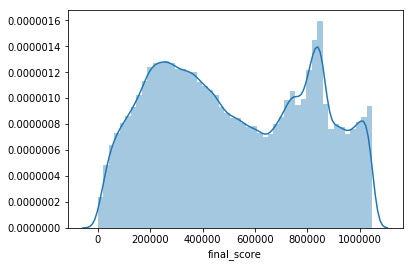

In [209]:
sns.distplot(fraud_score['final_score'])

/Users/tianzehu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


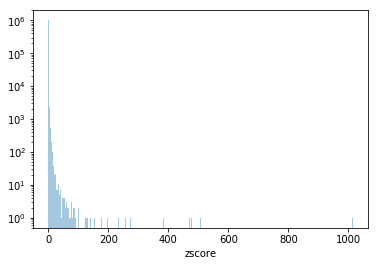

In [214]:
ax= sns.distplot(score_1['zscore'], bins=1000, kde=False)
ax.set_yscale('log',nonposy='clip')

/Users/tianzehu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


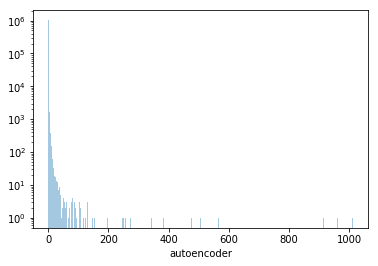

In [215]:
ax= sns.distplot(score_2['autoencoder'], bins=1000, kde=False)
ax.set_yscale('log',nonposy='clip')